# 2. Use a custom dataset to train our model using handwritten recognition.

Make sure to install cv2 and tensorflow libraries before importing!!!

In [18]:
#Import all the libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Preprocessing

In [19]:
# Jason's 20 x 16 dataset

dim = 28
    
def getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=True, factor=1):
    img = cv2.imread(path)[:,:,0]

    if displayOrig:
        temp = np.invert(np.array([img]))
        plt.imshow(temp[0], cmap=plt.cm.binary)
        plt.show()
    
    resInput = [None]*16
    for row in range(16):
        cur = [None]*20
        for col in range(20):
            sub = img[row*29+1:row*29+29, col*29+1:col*29+29]
            sub = np.invert(np.array([sub]))
    
            cur[col]=sub
            if verbose:
                plt.imshow(sub[0], cmap=plt.cm.binary)
                plt.show()
        resInput[row] = cur

    resOutput = [None]*(20*16)
    for i in range(16):
        output = [0] * 16
        output[i]=1
        for idx in range(i*20, i*20+20):
            resOutput[idx]=output
    resInput = resInput * factor
    resOutput = resOutput * factor
    return resInput, resOutput
# getHandwrittenData()

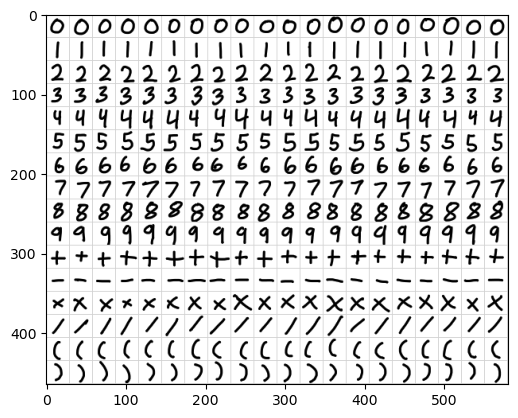

In [20]:
resInput, resOutput = getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=True)

resInput = tf.reshape(resInput, (-1, 28, 28, 1))  # Assuming each image is 28x28 pixels
resOutput = tf.reshape(resOutput, (-1, 16, 1))  # Assuming each image is 28x28 pixels

x_test = tf.stack([resInput[i] for i in range(0, 320, 20)])
y_test = tf.stack([resOutput[i] for i in range(0, 320, 20)])

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model with a set seed

In [22]:
# Funney
seed = hash("Group6TheBest") % (10**9 + 7)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()
model.fit(resInput, resOutput, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


ValueError: in user code:

    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\metrics\base_metric.py", line 143, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\metrics\base_metric.py", line 700, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\metrics\metrics.py", line 3669, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "C:\Users\Equipo\anaconda3\envs\gpu_env\lib\site-packages\keras\utils\metrics_utils.py", line 962, in sparse_categorical_matches
        y_true = tf.squeeze(y_true, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 16 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](remove_squeezable_dimensions/Squeeze)' with input shapes: [32,16].


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

In [ ]:
print(loss)
print(accuracy)

## Testing it with my own handwritten numbers

In [ ]:
image_number = 1

# Enable interactive mode for matplotlib
plt.ion()

image_number = 0
# folder_name = "digits_samples"
folder_name = "jason_digits"

while os.path.isfile(f"{folder_name}/digit{image_number}.png"):
    try:
        # Debugging statement
        print(f"Processing: {folder_name}/digit{image_number}.png")
        
        img = cv2.imread(f"{folder_name}/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        
        # Ensure the image is correctly read and processed
        if img is not None:
            prediction = model.predict(img)
            print(f"This digit is probably a {np.argmax(prediction)}")
            plt.imshow(img[0], cmap=plt.cm.binary)
            plt.show()
        else:
            print(f"Failed to load image {folder_name}/digit{image_number}.png")
            
    except Exception as e:
        print(f"Error: {e}")
    finally:
        image_number += 1

# Turn off interactive mode
plt.ioff()

### Parse some expression

In [ ]:
import cv2
import numpy as np
dim = 28

def isEmpty(imgBin):
    imgBin = imgBin[0]
    for row in imgBin:
        if row.tolist().count(0)!=dim: return False
    return True
    
def splitExpression(path="expression0.png", verbose=False, displayOrig=True):
    img = cv2.imread(path)[:,:,0]
    divs = img.shape[1]//dim

    if displayOrig:
        temp = np.invert(np.array([img]))
        plt.imshow(temp[0], cmap=plt.cm.binary)
        plt.show()
    res = []
    for i in range(divs):
        sub = img[1:dim+1, i*29+1:i*29+1+dim]
        sub = np.invert(np.array([sub]))
        
        if isEmpty(sub): break

        res.append(sub)
        if verbose:
            plt.imshow(sub[0], cmap=plt.cm.binary)
            plt.show()
    return res

lookup = [str(i) for i in range(10)] + list("+-*/()")
def getToken(img, verbose=False):
    return lookup[np.argmax(model.predict(img, verbose=verbose))]

def parseExpression(path="expression0.png", verbose=False, displayOrig=True):
    images = splitExpression(path=path, verbose=verbose)
    return "".join(map(getToken, images))

In [ ]:
def getAccuracy(path="tokens0.png", includeSpecialChars=True):
    length = 16 if includeSpecialChars else 10
    res = parseExpression(verbose=0, path=path)
    exp = "".join(lookup)
    mismatch = [" "]*length
    acc=0
    for i in range(length):
        if res[i]==exp[i]: acc+=1
        else: mismatch[i]="^"
    print(exp[:length])
    print(res[:length])
    print("".join(mismatch))
    print("Accuracy:", acc/length)

In [ ]:
getAccuracy("tokens0.png")
getAccuracy("tokens1.png")
getAccuracy("tokens2.png")

In [ ]:
import traceback

def solve(path):
    try:
        expr = parseExpression(path=path)
        print(expr)
        print(eval(expr))
    except:
        traceback.print_exc()
for i in range(3): solve(f"expression{i}.png")

### Confusion matrix

In [ ]:
# Jason's 20 x 16 dataset

dim = 28
    
def getHandwrittenData(path="handwritten_testing_data.png", verbose=False, displayOrig=True, factor=1):
    img = cv2.imread(path)[:,:,0]

    if displayOrig:
        temp = np.invert(np.array([img]))
        plt.imshow(temp[0], cmap=plt.cm.binary)
        plt.show()
    
    resInput = [None]*16
    for row in range(16):
        cur = [None]*20
        for col in range(20):
            sub = img[row*29+1:row*29+29, col*29+1:col*29+29]
            sub = np.invert(np.array([sub]))
    
            cur[col]=sub[0]
            if verbose:
                plt.imshow(sub[0], cmap=plt.cm.binary)
                plt.show()
        resInput[row] = cur

    resOutput = [None]*(20*16)
    for i in range(16):
        output = i
        for idx in range(i*20, i*20+20):
            resOutput[idx]=output
    resInput = resInput * factor
    resOutput = resOutput * factor
    return resInput, resOutput

In [ ]:
X_test, y_test = getHandwrittenData(path="handwritten_testing_data.png", verbose=False, displayOrig=True)

X_test = tf.reshape(X_test, (-1, 28, 28, 1))  # Assuming each image is 28x28 pixels

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
hm.set_xticklabels(list("0123456789+-*/()"))
hm.set_yticklabels(list("0123456789+-*/()"))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np

cm = confusion_matrix(y_test, y_pred)

# Initialize lists to store TN, TP, FN, FP for each class
TN = []
TP = []
FN = []
FP = []

for i in range(len(cm)):
    tp = cm[i, i]
    fp = sum(cm[:, i]) - tp
    fn = sum(cm[i, :]) - tp
    tn = sum(sum(cm)) - (tp + fp + fn)
    
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)

import pandas as pd
accuracy, precision, recall, f1 = [[0 for _ in range(len(cm))] for _ in range(4)]
for i in range(len(cm)):
	accuracy[i] = (TP[i]+TN[i])/(TP[i]+TN[i]+FP[i]+FN[i])
	precision[i] = TP[i]/(TP[i]+FP[i])
	recall[i] = TP[i]/(TP[i]+FN[i])
	f1[i] = 2*precision[i]*recall[i]/(precision[i]+recall[i])

rates = pd.DataFrame()
rates["Labels"] = list("0123456789+-*/()")
for rate, arr in zip(["TP", "FP", "FN", "TN", "Acc", "Prec", "Rec", "F1"], [TP, FP, FN, TN, accuracy, precision, recall, f1]): rates[rate] = arr
display(rates)